# Decision Trees

A decision tree is a machine learning algorithm that carves up the feature space into groups of observations that share similar target values and each leaf represents one of these groups. 
For regression, similarity in a leaf means a low variance among target values and, for classification, it means that most or all targets are of a single class.

Any path from the root of the decision tree to a specific leaf predictor passes through a series of (internal) decision nodes. 
Each decision node compares a single feature's value with a specific *split point* value learned during training.
To train a decision node, the model examines a subset of the training observations (or the full training set at the root).
The node's feature and split point within that feature space are chosen during training to split the observations into left and right buckets (subsets) to maximize similarity as defined above.
(This selection process is generally done through exhaustive comparison of features and feature values.)
The left bucket has observations whose feature values are all less than the split point and the right bucket has feature observations whose values are greater than the split point.
Tree construction proceeds recursively by creating decision nodes for the left bucket and the right bucket. Construction stops when some stopping criterion is reached, such as having less than five observations in the node.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error

## A. Decision Tree Classification From Scratch

### A.1. Splitting a Node

In [2]:
def split(vector, threshold):
    """
    Function that splits a feature vector based on a threshold.
    
    Parameters:
    -----------
    vector    : A NumPy array containing feature values (float values). 
    threshold : A threshold parameter for dividing the examples into a left and a right child node.
    
    Returns:
    --------
    A dictionary that has 3 keys, 'left', 'right', 'threshold'.
    The 'threshold' simply references the threshold we provided
    as function argument. The 'left' child node is an integer array
    containing the indices of the examples corresponding to feature
    values with value <= threshold. The 'right' child node is an integer array
    stores the indices of the examples for which the feature value > threshold.
      
    Examples:
    ---------
    >>> vector = np.array([0.0, 1.0, 4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0])
    >>> split(vector, threshold = 2.5)
    {'left': array([0, 1, 3, 4, 6, 7, 8, 9]), 'right': array([2, 5]), 'threshold': 2.5}
    
    >>> vector = np.array([0.0, 1.0, 4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0])
    >>> split(vector, threshold = 1.5)
    {'left': array([0, 1, 3, 4, 6, 7, 8]), 'right': array([2, 5, 9]), 'threshold': 1.5}
    """
    left,  = np.where(vector <= threshold)
    right, = np.where(vector > threshold)
    
    dictionary = {'left': left, 'right': right, 'threshold': threshold}
    
    return dictionary

In [3]:
vector = np.array([0.0, 1.0, 4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0])

print(split(vector, threshold = 2.5))
print(split(vector, threshold = 1.5))
print(split(vector, threshold = -0.5))
print(split(vector, threshold = 1.0))

{'left': array([0, 1, 3, 4, 6, 7, 8, 9]), 'right': array([2, 5]), 'threshold': 2.5}
{'left': array([0, 1, 3, 4, 6, 7, 8]), 'right': array([2, 5, 9]), 'threshold': 1.5}
{'left': array([], dtype=int64), 'right': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'threshold': -0.5}
{'left': array([0, 1, 3, 4, 6, 7, 8]), 'right': array([2, 5, 9]), 'threshold': 1.0}


### A.2. Gini and Entropy Impurity

Assume that we are dealing with target variable that contains $k$ classes: ${c_1, c_2, ..., c_k}$.
Then we define Gini impurity as:

$$ Gini = 1 - \sum_{i}^{k}p_i^{2}$$

where you can think of $p_i$ as the proportion of examples with class label $i$ in a data set.

On the other hand, we define Entropy impurity as:

$$ Entropy = \sum_{i}^{k}-p_ilog_{2}(p_i)$$

where you can think of $p_i$ as the proportion of examples with class label $i$ in a data set.

In [4]:
def gini(vector):
    """
    Function that computes the Gini impurity.
    
    Parameters:
    -----------
    vector : A NumPy array containing integers representing class labels.
    
    Returns:
    --------
    Gini impurity (float value).
    
    Examples:
    --------
    >>> gini(np.array([0, 0, 1, 1]))
    0.5
    
    >>> np.round(gini(np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), 4)
    0.1653
    """
    _, counts = np.unique(vector, return_counts = True)
    counts = np.array(counts)
    
    return 1 - np.power(counts / counts.sum(), 2).sum()


def entropy(vector):
    """
    Function that computes the Entropy impurity.
    
    Parameters:
    -----------
    vector : A NumPy array containing integers representing class labels.
    
    Returns:
    --------
    Entropy impurity (float value).
    
    Examples:
    --------
    >>> entropy(np.array([0, 0, 1, 1]))
    0.5
    
    >>> np.round(entropy(np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), 4)
    0.1653
    """
    _, counts = np.unique(vector, return_counts = True)
    counts = np.array(counts)
    probabilities = counts / np.sum(counts)
    
    return -np.sum(probabilities * np.log2(probabilities))

In [5]:
print(f'Gini score: {np.round(gini(np.array([0, 1, 0, 1, 1, 0])), 4)}')
print(f'Gini score: {np.round(gini(np.array([1, 2])), 4)}')
print(f'Gini score: {np.round(gini(np.array([1, 1])), 4)}')
print(f'Gini score: {np.round(gini(np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), 4)}')
print(f'Gini score: {np.round(gini(np.array([0, 0, 0])), 4)}')
print(f'Gini score: {np.round(gini(np.array([1, 1, 1, 0, 1, 4, 4, 2, 1])), 4)}')

Gini score: 0.5
Gini score: 0.5
Gini score: 0.0
Gini score: 0.1653
Gini score: 0.0
Gini score: 0.6173


In [6]:
print(f'Entropy score: {np.round(entropy(np.array([0, 1, 0, 1, 1, 0])), 4)}')
print(f'Entropy score: {np.round(entropy(np.array([1, 2])), 4)}')
print(f'Entropy score: {np.round(entropy(np.array([1, 1])), 4)}')
print(f'Entropy score: {np.round(entropy(np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), 4)}')
print(f'Entropy score: {np.round(entropy(np.array([0, 0, 0])), 4)}')
print(f'Entropy score: {np.round(entropy(np.array([1, 1, 1, 0, 1, 4, 4, 2, 1])), 4)}')

Entropy score: 1.0
Entropy score: 1.0
Entropy score: -0.0
Entropy score: 0.4395
Entropy score: -0.0
Entropy score: 1.6577


### A.3.  Information Gain

Now that we have a working solution for the gini and entropy impurity function, the next step is to compute the Information Gain. 
Information gain for a certain tree node is computed as:

$$ Gain(\mathcal{D}, x_i) = \mathcal{I}(\mathcal{D}) - \frac{|\mathcal{D}_{values(x_i) \leq split\_point}|}{|\mathcal{D}|} \mathcal{I}(D_{values(x_i) \leq split\_point}) - \frac{|\mathcal{D}_{values(x_i) \gt split\_point}|}{|\mathcal{D}|} \mathcal{I}(D_{values(x_i) \gt split\_point}) $$

where $x_i$ is a splitting feature, $\mathcal{I}(\mathcal{D})$ is impurity of the target variable on the entire data set $\mathcal{D}$, $\mathcal{I}(\mathcal{D}_{values(x_i) \leq split\_point})$ is impurity of the target variable on the part of the dataset where $values(x_i) \leq split\_point$, and $\mathcal{I}(\mathcal{D}_{values(x_i) \gt split\_point})$ is impurity of the target variable on the part of the dataset where $values(x_i) \gt split\_point$.

In [7]:
def information_gain(y_vector, split_point):
    """
    Function to compute information gain.
    
    Parameters:
    -----------
    y_vector    : NumPy array containing the class labels for each training example.  
    split_point : A dictionary created by the `split` function, which contains the indices for the left and right child node.
      
    Returns:
    --------
    Information gain for the given split in `split_point`.
    
    Examples:
    ---------
    >>> x_ary = np.array([0.0, 1.0, 4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0])
    >>> y_ary = np.array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0])
    
    >>> split_dict_1 = split(vector = x_ary, threshold = 2.5)
    >>> information_gain(x_vector = x_ary, y_vector = y_ary, split_point = split_dict_1)
    0.004999999999999977
    
    >>> split_dict_3 = split(vector = x_ary, threshold = -1.5)
    >>> information_gain(x_vector = x_ary, y_vector = y_ary, split_point = split_dict_3)
    0.003809523809523735
    """
    parent_gini = gini(y_vector)
    
    for child in ('left', 'right'):
        
        frequency    = split_point[child].shape[0] / y_vector.shape[0]
        child_gini   = gini(y_vector[(split_point[child])])
        parent_gini -= frequency * child_gini
        
    return parent_gini

In [8]:
x_ary = np.array([0.0, 1.0, 4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0])
y_ary = np.array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

split_dict_1 = split(vector = x_ary, threshold = 2.5)
print(f'Information Gain: {information_gain(y_vector = y_ary, split_point = split_dict_1)}')
      
split_dict_2 = split(vector = x_ary, threshold = 1.5)
print(f'Information Gain: {information_gain(y_vector = y_ary, split_point = split_dict_2)}')

split_dict_3 = split(vector = x_ary, threshold = -1.5)
print(f'Information Gain: {information_gain(y_vector = y_ary, split_point = split_dict_3)}')

Information Gain: 0.004999999999999977
Information Gain: 0.003809523809523735
Information Gain: 0.0


### A.4. Creating Different Splitting Thresholds

In [9]:
def get_thresholds(vector):
    """
    Get thresholds from a feature vector.
    
    Parameters:
    -----------
    vector : Vector with feature values.
      
    Returns:
    --------
    NumPy float array containing thresholds.
    
    Examples:
    ---------
    >>> a = np.array([0.1, 1.2, 2.4, 2.5, 2.7, 3.3, 3.7])
    >>> get_thresholds(a)
    [0.65 1.8  2.45 2.6  3.   3.5 ]
    
    >>> b = np.array([3.7, 2.4, 1.2, 2.5, 3.3, 2.7, 0.1])
    >>> get_thresholds(b)
    [0.65 1.8  2.45 2.6  3.   3.5 ]
    """
    vector_sorted = np.sort(vector)
    
    return np.unique((vector_sorted[1:] + vector_sorted[:-1]) / 2)

In [10]:
a = np.array([0.1, 1.2, 2.4, 2.5, 2.7, 3.3, 3.7])
print(f'Thresholds: {get_thresholds(a)}')

b = np.array([3.7, 2.4, 1.2, 2.5, 3.3, 2.7, 0.1])
print(f'Thresholds: {get_thresholds(b)}')

Thresholds: [0.65 1.8  2.45 2.6  3.   3.5 ]
Thresholds: [0.65 1.8  2.45 2.6  3.   3.5 ]


### A.5. Selecting The Best Splitting Threshold

In [11]:
def get_best_threshold(x_vector, y_vector):
    """
    Function to obtain the best threshold based on maximizing information gain.
    
    Parameters:
    -----------
    x_vector : Feature vector containing the feature values of a feature for each training example.
    y_array  : NumPy array containing the class labels for each training example.
    
    Returns:
    --------
    A float representing the best threshold to split the given feature variable on.
    
    Examples:
    ---------
    >>> x_ary = np.array([0.0, 1.0, 4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0])
    >>> y_ary = np.array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0])
    
    >>> get_best_threshold(x_vector = x_ary, y_vector = y_ary)
    3.5
    
    >>> get_best_threshold(x_vector = x_ary, y_vector = y_ary)
    3.5
    """
    all_thresholds = get_thresholds(x_vector)
    info_gains     = np.zeros(all_thresholds.shape[0])

    for index, threshold in enumerate(all_thresholds):
    
        split_point = split(x_vector, threshold)
        ig = information_gain(y_vector, split_point)

        info_gains[index] = ig
        
    best_index     = np.argmax(info_gains)
    best_threshold = all_thresholds[best_index]
    
    return best_threshold

In [12]:
x_ary = np.array([0.0, 1.0, 4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0])
y_ary = np.array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

print(f'Best treshold: {get_best_threshold(x_vector = x_ary, y_vector = y_ary)}')

x_ary = np.array([0.0, 3.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 4.0, 1.0])
y_ary = np.array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

print(f'Best treshold: {get_best_threshold(x_vector = x_ary, y_vector = y_ary)}')

Best treshold: 3.5
Best treshold: 3.5


### A.6. Building Decision Tree API 

In [13]:
class TreeNode(object):
    """
    TreeNode class implementation.
    """
    def __init__(self, split_point, impurity, left_child = None, right_child = None):
        """
        TreeNode constructor.
        
        Parameters:
        -----------
        split_point : The best split point information.
        impurity    : The impurity value of a TreeNode.
        left_child  : TreeNode's left child.
        right_child : TreeNode's right child.
        """
        self.__split_point = split_point
        self.__impurity    = np.round(impurity, 2)
        
        self.left  = left_child
        self.right = right_child
     
    
    def is_leaf(self):
        """
        Checks if TreeNode is a leaf.
        
        Returns:
        --------
        `True` if this TreeNode is a leaf, `False` otherwise.
        """
        return 'targets' in self.__split_point
    
    
    def traverse(self, vector):
        """
        Traverses the tree according to split criteria.
        
        Parameters:
        -----------
        vector : A NumPy array containing feature values.
        
        Returns:
        --------
        Left or right child depending on the evaluation of split criteria.
        """
        index     = self.__split_point['feature'][0]
        threshold = self.__split_point['threshold']
        
        return self.left if vector[index] <= threshold else self.right
        
    
    def vote(self):
        """
        Leaf's prediction.
        
        Returns:
        --------
        Leaf's prediction.
        """
        targets = self.__split_point['targets']
        classes, counts = np.unique(targets, return_counts = True)
        
        return classes[np.argmax(counts)]
    
    
    def __str__(self):
        """
        TreeNode's string representation.
        
        Returns:
        --------
        TreeNode's string representation.
        """
        if 'feature' in self.__split_point:
            feature   = self.__split_point['feature'][1]
            threshold = self.__split_point['threshold']
            samples   = self.__split_point['left'].shape[0] + self.__split_point['right'].shape[0]
        
            return f"TreeNode(feature: {feature}, threshold: {np.round(threshold, 2)}, samples: {samples}, impurity: {self.__impurity})"
        else:
            targets = self.__split_point['targets']
            samples = len(targets)
            
            return f"TreeNode(tragets: {targets}, samples: {samples}, impurity: {self.__impurity})"

In [14]:
class DecisionTreeClassifier(object):
    """
    DecisionTreeClassifier class.
    """
    def __init__(self, impurity_measure = 'gini'):
        """
        DecisionTreeClassifier constructor.
        
        Parameters:
        -----------
        impurity_measure : `gini` or `entropy` - impurity measure.
        """
        self.__root = None
        
        if impurity_measure == 'entropy':
            self.__metric = self.__entropy
        else:
            self.__metric = self.__gini
        
        
    def fit(self, X, y, feature_names = None):
        """
        Fits DecisionTreeClassifier model.
        
        Parameters:
        -----------
        X : NumPy ndarray containing training examples.
        y : NumPy array containing the class labels for each training example.
        
        Examples:
        ---------
        >>> X = np.array([[0., 0., 1., 1., 2., 2.], [0., 1., 0., 1., 0., 1.]]).T
        >>> y = np.array([0,  1,  0,  1,  1,  1])
        >>> decision_tree = DecisionTreeClassifier(impurity_measure = 'gini')
        >>> decision_tree.fit(X, y, feature_names = ['A', 'B'])
        >>> print(decision_tree)
            Level 0: TreeNode(feature: B, threshold: 0.0, samples: 6, impurity: 0.44)
            Level 1: TreeNode(feature: A, threshold: 1.5, samples: 3, impurity: 0.44) TreeNode(tragets: [1 1 1], samples: 3, impurity: 0.0) 
            Level 2: TreeNode(tragets: [0 0], samples: 2, impurity: 0.0) TreeNode(tragets: [1], samples: 1, impurity: 0.0)  None  None 
            Level 3: None None  None  None
        """
        self.__X = X.copy()
        self.__y = y.copy()
        
        if isinstance(feature_names, str):
            feature_names = [feature_names]
            
        if feature_names is not None:
            self.__features = dict(enumerate(feature_names))
        else:
            self.__features = dict(enumerate(range(X.shape[1])))
        
        self.__root = self.__grow_tree(self.__root, self.__X, self.__y)
        
    
    def predict(self, X):
        """
        Predicts classes for each feature vector in a data set.
        
        Parameters:
        -----------
        X : A NumPy ndarray containing feature vectors.
        
        Returns:
        --------
        A NumPy ndarray containing class predictions for feature vectors.
        
        Examples:
        ---------
        >>> X = np.array([[0., 0., 1., 1., 2., 2.], [0., 1., 0., 1., 0., 1.]]).T
        >>> y = np.array([0,  1,  0,  1,  1,  1])
        >>> decision_tree = DecitionTreeClassification(impurity_measure = 'gini')
        >>> decision_tree.fit(X, y, feature_names = ['A', 'B'])
        >>> decision_tree.predict(X)
        array([[0.],
               [1.],
               [0.],
               [1.],
               [1.],
               [1.]])
        """
        predictions = np.zeros(X.shape[0])
        
        for index, vector in enumerate(X):
            predictions[index] = self.__predict_single(self.__root, vector)
        
        return predictions.reshape(-1, 1)
        
    
    def __predict_single(self, node, vector):
        """
        Predicts class for a single feature vector.
        
        Parameters:
        -----------
        node : A TreeNode. 
        vector : A NumPy array representing feature vector.
        
        Returns:
        --------
        Class prediction for a given feature vector.
        """
        if node.is_leaf():
            return node.vote()
        
        return self.__predict_single(node.traverse(vector), vector)
    
    
    def __grow_tree(self, tree_node, X, y):
        """
        Grows decision tree.
        
        Parameters:
        -----------
        X : NumPy ndarray representing the subset of training examples.
        y : NumPy array containing the class labels for the subset of training examples.
        """
        if self.__metric(y) == 0:
            split_point = {}
            split_point['targets'] = y.copy()
            return TreeNode(split_point, 0)
        
        thresholds = np.array([]);
        gains      = np.array([]);
        
        for vector in X.T:
            threshold, gain = self.__get_best_threshold(vector, y)
            
            thresholds = np.append(thresholds, threshold)
            gains      = np.append(gains, gain)
    
        index                  = np.argmax(gains)
        split_point            = self.__split(X[:,index], thresholds[index])
        split_point['feature'] = (index, self.__features[index])
        
        tree_node = TreeNode(split_point, self.__metric(y))
        
        if gains[index] <= 1e-05:
            return tree_node
        
        tree_node.left  = self.__grow_tree(tree_node.left, X[(split_point['left'])], y[(split_point['left'])])
        tree_node.right = self.__grow_tree(tree_node.right, X[(split_point['right'])], y[(split_point['right'])])
        
        return tree_node
    
    
    def __get_best_threshold(self, x_vector, y_vector):
        """
        Function to obtain the best threshold based on maximizing information gain.

        Parameters:
        -----------
        x_vector : Feature vector containing the feature values of a feature for each training example.
        y_array  : A NumPy array containing the class labels for each training example.

        Returns:
        --------
        A float representing the best threshold to split the given feature variable on.
        """
        all_thresholds = self.__get_thresholds(x_vector)
        info_gains     = np.zeros(all_thresholds.shape[0])

        for index, threshold in enumerate(all_thresholds):

            split_point = self.__split(x_vector, threshold)
            info_gain   = self.__information_gain(y_vector, split_point)

            info_gains[index] = info_gain

        best_index     = np.argmax(info_gains)
        best_threshold = all_thresholds[best_index]

        return best_threshold, info_gains[best_index]


    def __get_thresholds(self, vector):
        """
        Get thresholds from a feature vector.

        Parameters:
        -----------
        vector : A NumPy array containing feature values (float values).

        Returns:
        --------
        NumPy float array containing thresholds.
        """
        vector_sorted = np.sort(vector)
    
        return np.unique((vector_sorted[1:] + vector_sorted[:-1]) / 2)
    
    
    def __split(self, vector, threshold):
        """
        Function that splits a feature vector based on a threshold.

        Parameters:
        -----------
        vector    : A NumPy array containing feature values (float values). 
        threshold : A threshold parameter for dividing the examples into a left and a right child node.

        Returns:
        --------
        A dictionary that has 3 keys, 'left', 'right', 'threshold'.
        The 'threshold' simply references the threshold we provided
        as function argument. The 'left' child node is an integer array
        containing the indices of the examples corresponding to feature
        values with value <= threshold. The 'right' child node is an integer array
        stores the indices of the examples for which the feature value > threshold.
        """
        left,  = np.where(vector <= threshold)
        right, = np.where(vector > threshold)
    
        dictionary = {'left': left, 'right': right, 'threshold': threshold}
    
        return dictionary
    
    
    def __information_gain(self, y_vector, split_point):
        """
        Function to compute information gain.

        Parameters:
        -----------
        y_vector    : A NumPy array containing the class labels for each training example.  
        split_point : A dictionary created by the `split` function, which contains the indices for the left and right child node.

        Returns:
        --------
        Information gain for the given split in `split_point`.
        """
        parent_metric = self.__metric(y_vector)

        for child in ('left', 'right'):

            frequency      = split_point[child].shape[0] / y_vector.shape[0]
            child_metric   = self.__metric(y_vector[(split_point[child])])
            parent_metric -= frequency * child_metric

        return parent_metric
    
    
    def __gini(self, vector):
        """
        Function that computes the Gini impurity.

        Parameters:
        -----------
        vector : A NumPy array containing feature values. 
                 Typically, an array containing integers representing class labels.

        Returns:
        --------
        Gini impurity (float value).
        """
        _, counts = np.unique(vector, return_counts = True)
        counts    = np.array(counts)

        return 1 - np.power(counts / counts.sum(), 2).sum()
    
    
    def __entropy(self, vector):
        """
        Function that computes the Entropy impurity.

        Parameters:
        -----------
        vector : A NumPy array containing feature values. 
                 Typically, an array containing integers representing class labels.

        Returns:
        --------
        Entropy impurity (float value).
        """
        _, counts = np.unique(vector, return_counts = True)
        counts    = np.array(counts)
        
        return -np.sum((counts / np.sum(counts)) * np.log2(counts / np.sum(counts)))
    
    
    def __str__(self):
        """
        DecisionTreeClassifier string representation.
        """
        queue   = [self.__root]
        string  = ''
        counter = 0
        
        while len(queue) != 0:
            current = queue.pop(0)
            counter = counter + 1
            
            if np.log2(counter).is_integer():
                string += f'\n Level {int(np.log2(counter))}: {current}'
            else:
                string += f' {current} '
                
            if current is not None:
                queue.append(current.left)
                queue.append(current.right)
                
        return string

In [15]:
X = np.array([[0., 0., 1., 1., 2., 2.], [0., 1., 0., 1., 0., 1.], [2, 2, 0, 1, 0, 2]]).T
y = np.array([0,  1,  0,  1,  1,  1])

In [16]:
decision_tree = DecisionTreeClassifier(impurity_measure = 'gini')
decision_tree.fit(X, y, feature_names = ['A', 'B', 'C'])

decision_tree.predict(X)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]])

### A.7. Iris Dataset

Let us fit our model to the `iris` dataset.

In [17]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']
feature_names = iris['feature_names']

In [18]:
decision_tree = DecisionTreeClassifier(impurity_measure = 'entropy')
decision_tree.fit(X = X, y = y, feature_names = feature_names)

predictions = decision_tree.predict(X = X)

print(f'Model accuracy: {accuracy_score(y, predictions.reshape(1,-1)[0]) * 100} %')

Model accuracy: 100.0 %


## B. Sklearn Decision Tree Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy')
decision_tree.fit(X = X, y = y)

predictions = decision_tree.predict(X = X)

print(f'Model accuracy: {accuracy_score(y, predictions.reshape(1,-1)[0]) * 100} %')

Model accuracy: 100.0 %


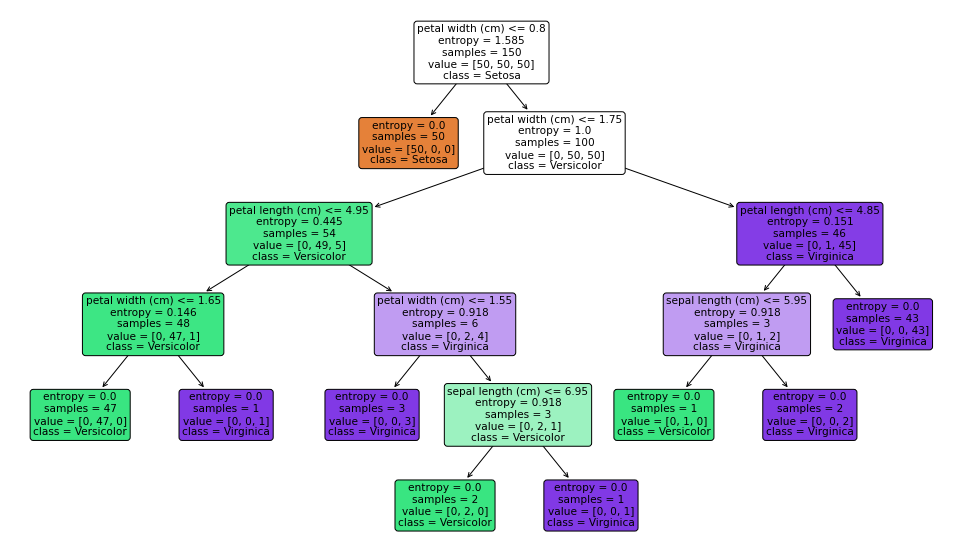

In [21]:
plt.figure(figsize = (17, 10))
plot_tree(decision_tree = decision_tree, filled = True, rounded = True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names = feature_names) 

plt.show()

In [22]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
decision_tree.fit(X = X, y = y)

predictions = decision_tree.predict(X = X)

print(f'Model accuracy: {accuracy_score(y, predictions.reshape(1,-1)[0]) * 100} %')

Model accuracy: 97.33333333333334 %


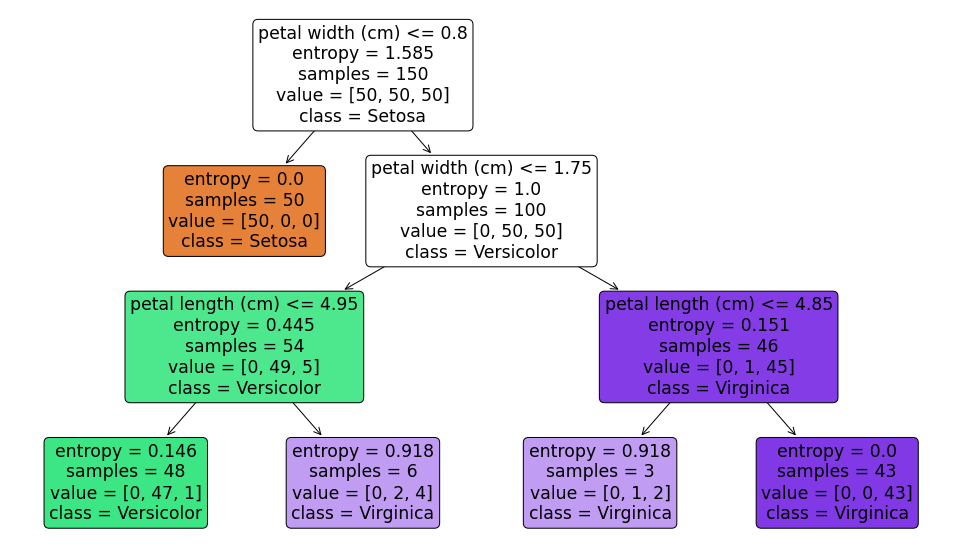

In [23]:
plt.figure(figsize = (17, 10))
plot_tree(decision_tree = decision_tree, filled = True, rounded = True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names = feature_names) 

plt.show()

In [24]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 5)
decision_tree.fit(X = X, y = y)

predictions = decision_tree.predict(X = X)

print(f'Model accuracy: {accuracy_score(y, predictions.reshape(1,-1)[0]) * 100} %')

Model accuracy: 97.33333333333334 %


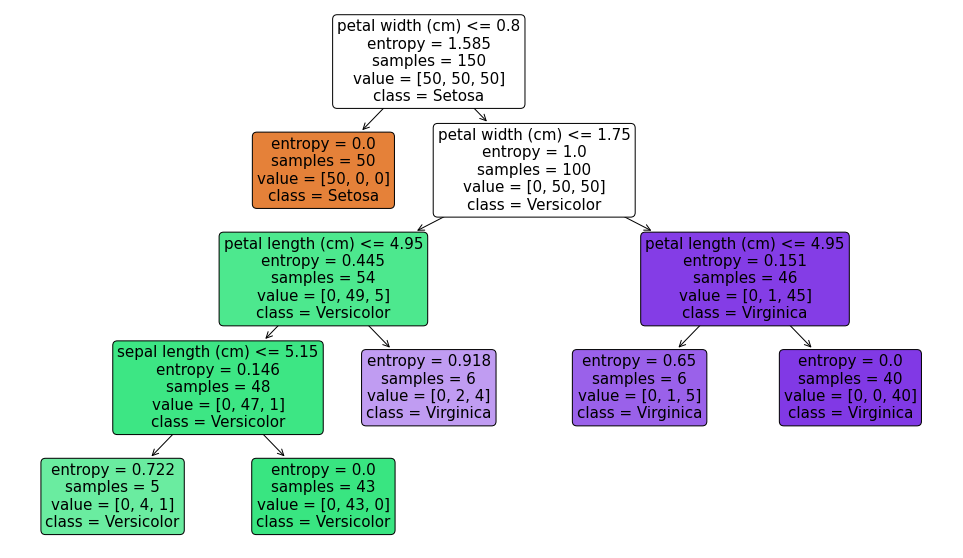

In [25]:
plt.figure(figsize = (17, 10))
plot_tree(decision_tree = decision_tree, filled = True, rounded = True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names = feature_names) 

plt.show()

## C. Decision Tree Regression From Scratch

In [26]:
class TreeNode(object):
    """
    TreeNode class implementation.
    """
    def __init__(self, split_point, impurity, left_child = None, right_child = None):
        """
        TreeNode constructor.
        
        Parameters:
        -----------
        split_point : The best split point information.
        impurity    : The impurity value of a TreeNode.
        left_child  : TreeNode's left child.
        right_child : TreeNode's right child.
        """
        self.__split_point = split_point
        self.__impurity    = np.round(impurity, 2)
        
        self.left  = left_child
        self.right = right_child
     
    
    def is_leaf(self):
        """
        Checks if TreeNode is a leaf.
        
        Returns:
        --------
        `True` if this TreeNode is a leaf, `False` otherwise.
        """
        return 'targets' in self.__split_point
    
    
    def traverse(self, vector):
        """
        Traverses the tree according to split criteria.
        
        Parameters:
        -----------
        vector : A NumPy array containing feature values.
        
        Returns:
        --------
        Left or right child depending on the evaluation of split criteria.
        """
        index     = self.__split_point['feature'][0]
        threshold = self.__split_point['threshold']
        
        return self.left if vector[index] <= threshold else self.right
        
    
    def vote(self):
        """
        Leaf's prediction.
        
        Returns:
        --------
        Leaf's prediction.
        """
        targets = self.__split_point['targets']
        
        return targets.mean()
    
    
    def __str__(self):
        """
        TreeNode's string representation.
        
        Returns:
        --------
        TreeNode's string representation.
        """
        if 'feature' in self.__split_point:
            feature   = self.__split_point['feature'][1]
            threshold = self.__split_point['threshold']
            samples   = self.__split_point['left'].shape[0] + self.__split_point['right'].shape[0]
        
            return f"TreeNode(feature: {feature}, threshold: {np.round(threshold, 2)}, samples: {samples}, impurity: {self.__impurity})"
        else:
            targets = self.__split_point['targets']
            samples = len(targets)
            
            return f"TreeNode(tragets: {targets}, samples: {samples}, impurity: {self.__impurity})"

In [27]:
class DecisionTreeRegressor(object):
    """
    DecisionTreeRegressor class.
    """
    def __init__(self):
        """
        DecisionTreeRegressor constructor.
        """
        self.__root = None
        
        
    def fit(self, X, y, feature_names = None):
        """
        Fits DecisionTreeRegressor model.
        
        Parameters:
        -----------
        X : NumPy ndarray containing training examples.
        y : NumPy array containing the class labels for each training example.
        
        Examples:
        ---------
        >>> X = np.array([[0., 0., 1., 1., 2., 2.], [0., 1., 0., 1., 0., 1.]]).T
        >>> y = np.array([1.2,  2.7,  3.1,  1.7,  5,  7.2])
        >>> decision_tree = DecisionTreeRegressor()
        >>> decision_tree.fit(X = X, y = y)
        >>> print(decision_tree)
        Level 0: TreeNode(feature: 0, threshold: 1.0, samples: 6, impurity: 4.21)
        Level 1: TreeNode(feature: 0, threshold: 0.0, samples: 4, impurity: 0.58) TreeNode(feature: 1, threshold: 0.5, samples: 2, impurity: 1.21) 
        Level 2: TreeNode(feature: 1, threshold: 0.5, samples: 2, impurity: 0.56) TreeNode(feature: 1, threshold: 0.5, samples: 2, impurity: 0.49)  TreeNode(tragets: [5.], samples: 1, impurity: 0)  TreeNode(tragets: [7.2], samples: 1, impurity: 0) 
        Level 3: TreeNode(tragets: [1.2], samples: 1, impurity: 0) TreeNode(tragets: [2.7], samples: 1, impurity: 0)  TreeNode(tragets: [3.1], samples: 1, impurity: 0)  TreeNode(tragets: [1.7], samples: 1, impurity: 0)  None  None  None  None 
        Level 4: None None  None  None  None  None  None  None
        """
        self.__X = X.copy()
        self.__y = y.copy()
        
        if isinstance(feature_names, str):
            feature_names = [feature_names]
            
        if feature_names is not None:
            self.__features = dict(enumerate(feature_names))
        else:
            self.__features = dict(enumerate(range(X.shape[1])))
        
        self.__root = self.__grow_tree(self.__root, self.__X, self.__y)
        
    
    def predict(self, X):
        """
        Predicts targets for each feature vector in a data set.
        
        Parameters:
        -----------
        X : A NumPy ndarray containing feature vectors.
        
        Returns:
        --------
        A NumPy ndarray containing target predictions for feature vectors.
        
        Examples:
        ---------
        >>> X = np.array([[0., 0., 1., 1., 2., 2.], [0., 1., 0., 1., 0., 1.]]).T
        >>> y = np.array([1.2,  2.7,  3.1,  1.7,  5,  7.2])
        >>> decision_tree = DecisionTreeRegressor()
        >>> decision_tree.fit(X = X, y = y)
        >>> decision_tree.predict(X = X)
        array([[1.2],
               [2.7],
               [3.1],
               [1.7],
               [5. ],
               [7.2]])
        """
        predictions = np.zeros(X.shape[0])
        
        for index, vector in enumerate(X):
            predictions[index] = self.__predict_single(self.__root, vector)
        
        return predictions.reshape(-1, 1)
        
    
    def __predict_single(self, node, vector):
        """
        Predicts target for a single feature vector.
        
        Parameters:
        -----------
        node : A TreeNode. 
        vector : A NumPy array representing feature vector.
        
        Returns:
        --------
        Target prediction for a given feature vector.
        """
        if node.is_leaf():
            return node.vote()
        
        return self.__predict_single(node.traverse(vector), vector)
    
    
    def __grow_tree(self, tree_node, X, y):
        """
        Grows decision tree.
        
        Parameters:
        -----------
        X : NumPy ndarray representing the subset of training examples.
        y : NumPy array containing the class labels for the subset of training examples.
        """
        if self.__mean_squared_error(y) <= 1e-03:
            split_point = {}
            split_point['targets'] = y.copy()
            return TreeNode(split_point, 0)
        
        thresholds = np.array([]);
        reductions = np.array([]);
        
        for vector in X.T:
            threshold, reduction = self.__get_best_threshold(vector, y)

            thresholds = np.append(thresholds, threshold)
            reductions = np.append(reductions, reduction)
    
        index                  = np.argmax(reductions)
        split_point            = self.__split(X[:,index], thresholds[index])
        split_point['feature'] = (index, self.__features[index])
        
        tree_node = TreeNode(split_point, self.__mean_squared_error(y))
        
        if reductions[index] <= 1e-03:
            return tree_node
        
        tree_node.left  = self.__grow_tree(tree_node.left, X[(split_point['left'])], y[(split_point['left'])])
        tree_node.right = self.__grow_tree(tree_node.right, X[(split_point['right'])], y[(split_point['right'])])
        
        return tree_node
    
    
    def __get_best_threshold(self, x_vector, y_vector):
        """
        Function to obtain the best threshold based on minimizing MSE.

        Parameters:
        -----------
        x_vector : Feature vector containing the feature values of a feature for each training example.
        y_array  : A NumPy array containing the targets for each training example.

        Returns:
        --------
        A float representing the best threshold to split the given feature variable on.
        """
        all_thresholds = self.__get_thresholds(x_vector)
        reductions     = np.zeros(all_thresholds.shape[0])

        for index, threshold in enumerate(all_thresholds):
            
            split_point = self.__split(x_vector, threshold)
            reduction   = self.__mse_reduction(y_vector, split_point)

            reductions[index] = reduction

        best_index     = np.argmax(reductions)
        best_threshold = all_thresholds[best_index]

        return best_threshold, reductions[best_index]


    def __get_thresholds(self, vector):
        """
        Get thresholds from a feature vector.

        Parameters:
        -----------
        vector : A NumPy array containing feature values (float values).

        Returns:
        --------
        NumPy float array containing thresholds.
        """
        vector_sorted = np.sort(vector)
    
        return np.unique((vector_sorted[1:] + vector_sorted[:-1]) / 2)
    
    
    def __split(self, vector, threshold):
        """
        Function that splits a feature vector based on a threshold.

        Parameters:
        -----------
        vector    : A NumPy array containing feature values (float values). 
        threshold : A threshold parameter for dividing the examples into a left and a right child node.

        Returns:
        --------
        A dictionary that has 3 keys, 'left', 'right', 'threshold'.
        The 'threshold' simply references the threshold we provided
        as function argument. The 'left' child node is an integer array
        containing the indices of the examples corresponding to feature
        values with value <= threshold. The 'right' child node is an integer array
        stores the indices of the examples for which the feature value > threshold.
        """
        left,  = np.where(vector <= threshold)
        right, = np.where(vector > threshold)
    
        dictionary = {'left': left, 'right': right, 'threshold': threshold}
    
        return dictionary
    
    
    def __mse_reduction(self, y_vector, split_point):
        """
        Function to compute information gain.

        Parameters:
        -----------
        y_vector    : A NumPy array containing the class labels for each training example.  
        split_point : A dictionary created by the `split` function, which contains the indices for the left and right child node.

        Returns:
        --------
        Information gain for the given split in `split_point`.
        """
        parent_metric = self.__mean_squared_error(y_vector)

        for child in ('left', 'right'):

            frequency      = split_point[child].shape[0] / y_vector.shape[0]
            child_metric   = self.__mean_squared_error(y_vector[(split_point[child])])
            parent_metric -= frequency * child_metric

        return parent_metric
    
    
    def __mean_squared_error(self, vector):
        """
        Function that computes the MSE.

        Parameters:
        -----------
        vector : A NumPy array containing feature values. Typically, an array containing targets.

        Returns:
        --------
        Mean Squared Error - MSE.
        """
        if vector.size == 0:
            return 0;
        
        return np.mean(np.square(vector - vector.mean()))
    
    
    def __str__(self):
        """
        DecisionTreeRegressor string representation.
        """
        queue   = [self.__root]
        string  = ''
        counter = 0
        
        while len(queue) != 0:
            current = queue.pop(0)
            counter = counter + 1
            
            if np.log2(counter).is_integer():
                string += f'\n Level {int(np.log2(counter))}: {current}'
            else:
                string += f' {current} '
                
            if current is not None:
                queue.append(current.left)
                queue.append(current.right)
                
        return string

In [28]:
X = np.array([[0., 0., 1., 1., 2., 2.], [0., 1., 0., 1., 0., 1.]]).T
y = np.array([1.2,  2.7,  3.1,  1.7,  5,  7.2])

In [29]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X = X, y = y)

print(decision_tree)


 Level 0: TreeNode(feature: 0, threshold: 1.0, samples: 6, impurity: 4.21)
 Level 1: TreeNode(feature: 0, threshold: 0.0, samples: 4, impurity: 0.58) TreeNode(feature: 1, threshold: 0.5, samples: 2, impurity: 1.21) 
 Level 2: TreeNode(feature: 1, threshold: 0.5, samples: 2, impurity: 0.56) TreeNode(feature: 1, threshold: 0.5, samples: 2, impurity: 0.49)  TreeNode(tragets: [5.], samples: 1, impurity: 0)  TreeNode(tragets: [7.2], samples: 1, impurity: 0) 
 Level 3: TreeNode(tragets: [1.2], samples: 1, impurity: 0) TreeNode(tragets: [2.7], samples: 1, impurity: 0)  TreeNode(tragets: [3.1], samples: 1, impurity: 0)  TreeNode(tragets: [1.7], samples: 1, impurity: 0)  None  None  None  None 
 Level 4: None None  None  None  None  None  None  None 


In [30]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X = X, y = y)

decision_tree.predict(X = X)

array([[1.2],
       [2.7],
       [3.1],
       [1.7],
       [5. ],
       [7.2]])

### C.1. Diabetes Dataset

In [31]:
diabetes = datasets.load_diabetes()

X = diabetes['data']
y = diabetes['target']
feature_names = diabetes['feature_names']

In [32]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X = X, y = y, feature_names = feature_names)

predictions = decision_tree.predict(X = X)
print(f'MSE: {mean_squared_error(y, predictions)}')

MSE: 0.0


## D. Sklearn Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X = X, y = y)

predictions = decision_tree.predict(X = X)
print(f'MSE: {mean_squared_error(y, predictions)}')

MSE: 0.0


In [35]:
decision_tree = DecisionTreeRegressor(max_depth = 2)
decision_tree.fit(X = X, y = y)

predictions = decision_tree.predict(X = X)
print(f'MSE: {mean_squared_error(y, predictions)}')

MSE: 3360.050096675736


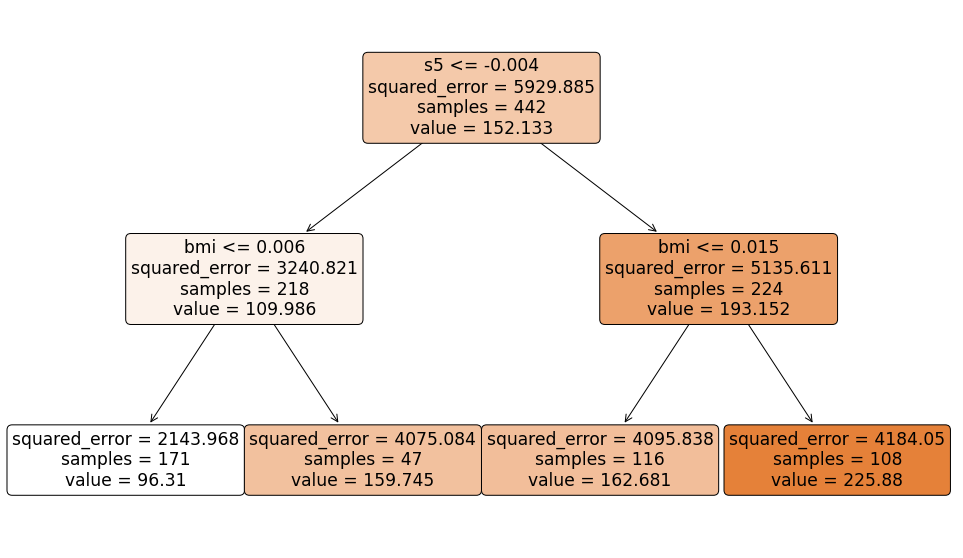

In [36]:
plt.figure(figsize = (17, 10))
plot_tree(decision_tree = decision_tree, filled = True, rounded = True, feature_names = feature_names) 

plt.show()

**Notes**:
    
 - The goal is to show the general principle of how to implement CARTs (**C**lassification **A**nd **R**egression **T**rees)
 - We show how these are implemented in `sklearn` library and how to use some core `sklean`'s functions and classes. 
 - Our trees are overfitting. They need hyperparameters in order to reduce overfit (`min_samples_leaf`, `max_depth`, etc.).